Dimensions of the data set: (178, 13)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Summary of the data set:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Inertia for cluster 1: 28.828396825396826
Inertia for cluster 2: 46.83793600000001
Inertia for cluster 3: 19.88760923076923
Inertia: 95.55394205616606


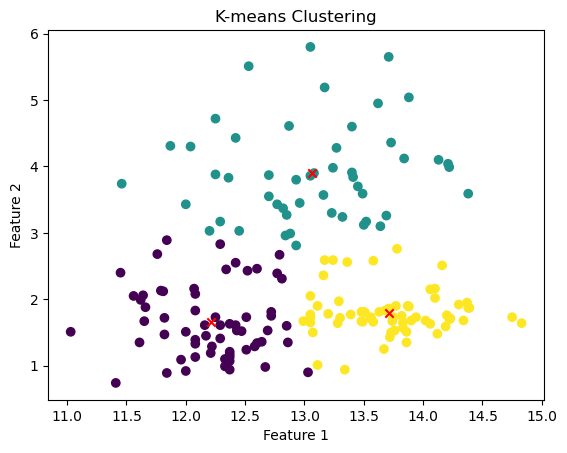

Cluster Assignments:
 [2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 1 2 1 2 1 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 0 0 2 0 2 0 0 2 2 2
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 0 1 1 1 1 1 2 1 1 1 1 1 1
 1 1 1 0 2 1 0 1 1 1 2 2 1 1 1 1 2 1 1 1 2 1 1 0 2 1 1 1 2 1]
Final Centroids:
 [[12.21349206  1.6531746 ]
 [13.0632      3.8948    ]
 [13.71538462  1.79969231]]


In [1]:
#################################
# K-means Implementation 

import numpy as np
from sklearn.datasets import load_wine
import matplotlib.pyplot as plt
import pandas as pd
import random

np.random.seed(10)

class KMeans:
    def __init__(self, n_clusters=3, max_iters=100):
        """
        Initialize KMeans clustering algorithm.

        Parameters:
        - n_clusters (int): Number of clusters.
        - max_iters (int): Maximum number of iterations.
        """
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.cluster_centers_ = None
        self.labels_ = None
        
    def fit(self, X): 
        """
        Fit KMeans to the data.
        Parameters:
        - X (array-like): Input data.
        """
        
        # Randomly initialize centroids
        self.cluster_centers_ = X[np.random.choice(len(X), self.n_clusters, replace=False), :]
        
        for _ in range(self.max_iters):
            # Assign each data point to the nearest centroid
            dist = np.sqrt(((X - self.cluster_centers_[:, np.newaxis])**2).sum(axis=2))
            self.labels_ = np.argmin(dist, axis=0)

            # Update centroids
            new_centroids = np.array([X[self.labels_ == i].mean(axis=0) for i in range(self.n_clusters)])
            
            # Check for convergence
            if np.all(self.cluster_centers_ == new_centroids):
                break
            self.cluster_centers_ = new_centroids


def inertia(X, labels, centroids): 
    """
    Calculate the inertia of KMeans clustering.

    Parameters:
    - X (array-like): Input data.
    - labels (array-like): Cluster labels.
    - centroids (array-like): Cluster centroids.

    Returns:
    - float: Inertia value.
    """
    
    total_inertia = 0
    for i in range(len(centroids)):
        cluster_inertia = ((X[labels == i] - centroids[i])**2).sum()
        total_inertia += cluster_inertia
        print(f"Inertia for cluster {i+1}: {cluster_inertia}")
    return total_inertia 

def visualize_clusters(X, labels, centroids):
    """
    Visualize KMeans clustering results.

    Parameters:
    - X (array-like): Input data.
    - labels (array-like): Cluster labels.
    - centroids (array-like): Cluster centroids.

    Returns:
    - None
    """

    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', color='red')
    plt.title("K-means Clustering")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

def main():
    # Load the Wine dataset
    wine = load_wine()
    
    df = pd.DataFrame(wine.data, columns=wine.feature_names)
    print("Dimensions of the data set:",df.shape)
    display(df.head(5))
    print("Summary of the data set:")
    display(df.describe())
    
    
    # Use only the first two features for visualization
    X = wine.data[:, :2]  

    # Perform KMeans clustering
    kmeans = KMeans(n_clusters=3)
    kmeans.fit(X)

    # Compute inertia
    print("Inertia:", inertia(X, kmeans.labels_, kmeans.cluster_centers_))

    # Visualize clusters
    visualize_clusters(X, kmeans.labels_, kmeans.cluster_centers_)
    
    print("Cluster Assignments:\n", kmeans.labels_)
    print("Final Centroids:\n", kmeans.cluster_centers_)

if __name__ == "__main__":
    main()


Inertia for k = 1: 337.55275842696625
Inertia for k = 2: 168.08374191698118
Inertia for k = 3: 95.55394205616612
Inertia for k = 4: 72.9219971369435
Inertia for k = 5: 60.74287609793349
Inertia for k = 6: 51.63030112015664
Inertia for k = 7: 43.61100603899898
Inertia for k = 8: 36.00640163059165
Inertia for k = 9: 32.034966230158744
Inertia for k = 10: 28.28353260331827


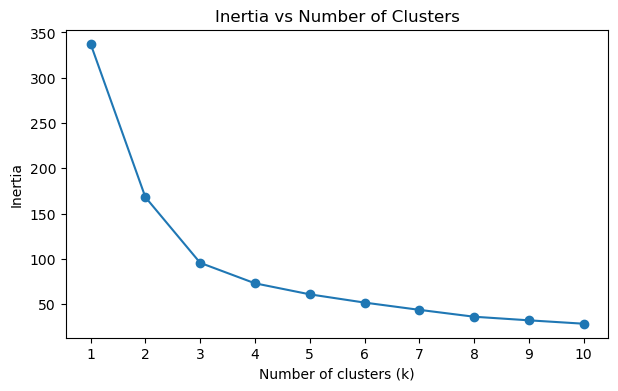

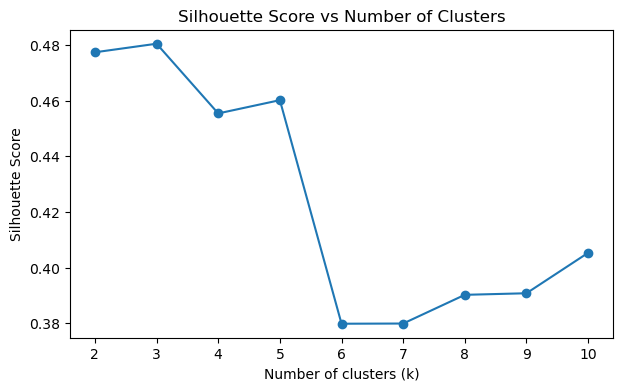

In [2]:
#################################
# How to choose K in K-means

import numpy as np
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def plot_inertia_vs_k(X, max_k=10): 
    """
    Plot the inertia versus the number of clusters.

    Parameters:
    - X (array-like): Input data.
    - max_k (int): Maximum number of clusters to consider. Default is 10.

    Returns:
    - None
    """
    inertias = []
    k_val = range(1, max_k + 1)
    
    for i in k_val:
        kmeans_model = KMeans(n_clusters=i, n_init=10, random_state=10)
        kmeans_model.fit(X)
        inertias.append(kmeans_model.inertia_)
        print(f"Inertia for k = {i}: {kmeans_model.inertia_}")
    
    plt.figure(figsize=(7, 4))
    plt.plot(k_val, inertias, marker = 'o')
    plt.title('Inertia vs Number of Clusters')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.xticks(k_val)
    plt.show()

def plot_silhouette_vs_k(X, max_k=10): 
    """
    Plot the silhouette score versus the number of clusters.

    Parameters:
    - X (array-like): Input data.
    - max_k (int): Maximum number of clusters to consider. Default is 10.

    Returns:
    - None
    """
    
    silhouette_scores = []
    k_val = range(2, max_k + 1)  # silhouette score is not defined for k=1
    
    for i in k_val:
        kmeans_model = KMeans(n_clusters=i, n_init=10, random_state=10)
        kmeans_model.fit(X)
        score = silhouette_score(X, kmeans_model.labels_)
        silhouette_scores.append(score)
    
    plt.figure(figsize=(7, 4))
    plt.plot(k_val, silhouette_scores, marker = 'o')
    plt.title('Silhouette Score vs Number of Clusters')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_val)
    plt.show()

def main():
    # Load the Wine dataset
    wine = load_wine()
    X = wine.data[:, :2]  # Use only the first two features for visualization

    # Plot Inertia vs Number of Clusters
    plot_inertia_vs_k(X)

    # Plot Silhouette Score vs Number of Clusters
    plot_silhouette_vs_k(X)

if __name__ == "__main__":
    main()

Eigenvalues: 
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]
-----------------------------------------------------------------------------
Eigenvectors: 
 [[-0.1443294   0.48365155  0.20738262 -0.0178563  -0.26566365  0.21353865
   0.05639636 -0.01496997  0.39613926 -0.26628645 -0.50861912 -0.22591696
   0.21160473]
 [ 0.24518758  0.22493093 -0.08901289  0.53689028  0.03521363  0.53681385
  -0.42052391 -0.02596375  0.06582674  0.12169604  0.07528304  0.07648554
  -0.30907994]
 [ 0.00205106  0.31606881 -0.6262239  -0.21417556 -0.14302547  0.15447466
   0.14917061  0.14121803 -0.17026002 -0.04962237  0.30769445 -0.49869142
  -0.02712539]
 [ 0.23932041 -0.0105905  -0.61208035  0.06085941  0.06610294 -0.10082451
   0.28696914 -0.09168285  0.42797018 -0.05574287 -0.20044931  0.47931378
   0.05279942]
 [-0.14199204  0.299634   -0.13075693 -0.35179658  0.72704851  0.03814394
  -0.3228833  -0.0

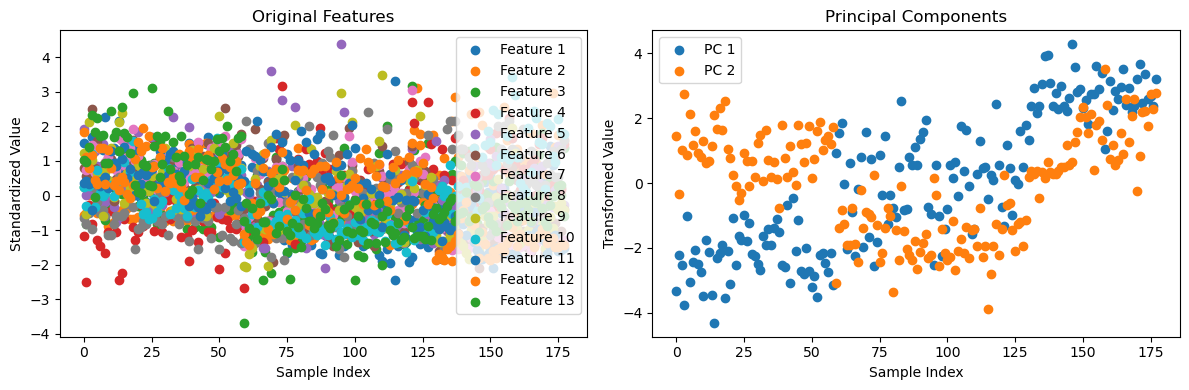

-----------------------------------------------------------------------------
Original Shape: (178, 13)
Transformed Shape: (178, 2)
-----------------------------------------------------------------------------
Explained variance ratio:
 ['36.20', '19.21', '11.12', '7.07', '6.56', '4.94', '4.24', '2.68', '2.22', '1.93', '1.74', '1.30', '0.80']


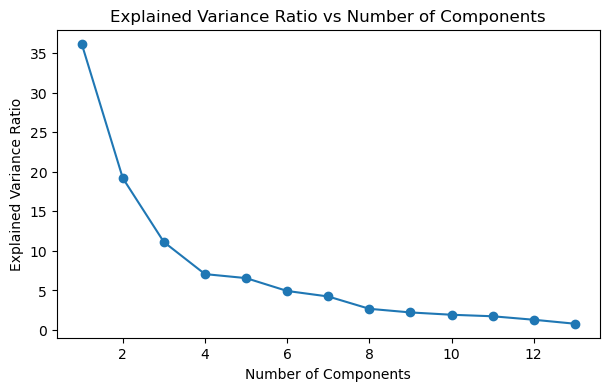

In [3]:
#################################
# PCA Implementation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine

class PCA:
    def __init__(self, n_components):
        """
        Initialize PCA object.

        Parameters:
        - n_components (int): Number of principal components to keep.

        Returns:
        - None
        """
        self.n_components = n_components

    def fit_transform(self, X): 
        """
        Fit PCA to the data and transform it into the principal components.

        Parameters:
        - X (array-like): Input data.

        Returns:
        - X_pca (array-like): Transformed data in the principal component space.
        """
        
        # Step 1: Standardize the data
        X_mean = sum(X)/len(X)
        X_standard_dev = (sum((i - X_mean)**2 for i in X)/len(X))**0.5
        X_std = (X - X_mean) / X_standard_dev

        # Step 2: Compute the covariance matrix
        cov_matrix = np.cov(X_std, rowvar=False)

        # Step 3: Compute eigenvalues and eigenvectors
        eigen_val, eigen_vec = np.linalg.eig(cov_matrix)
        
        print('Eigenvalues: \n', eigen_val)
        print('-----------------------------------------------------------------------------')
        print('Eigenvectors: \n', eigen_vec)

        # Step 4: Sort eigenvalues and eigenvectors in descending order
        sorted_ind = np.argsort(eigen_val)[::-1]
        eigen_val_sorted = eigen_val[sorted_ind]
        eigen_vec_sorted = eigen_vec[:, sorted_ind]
        
        print('-----------------------------------------------------------------------------')
        print('sorted Eigenvalues: \n', eigen_val_sorted)
        print('-----------------------------------------------------------------------------')

        # Step 5: Select the top n_components
        eigen_vec_subset = eigen_vec_sorted[:, :self.n_components]

        # Step 6: Transform the data
        X_pca = np.dot(X_std, eigen_vec_subset)
        
        # Plot visualize_features_vs_components
        pca.visualize_features_vs_components(X, X_std, X_pca)

        return X_pca

    def visualize_features_vs_components(self, X, X_std, X_pca):
        """
        Visualize original features vs principal components.

        Parameters:
        - X (array-like): Original input data.
        - X_std (array-like): Standardized input data.
        - X_pca (array-like): Transformed data in the principal component space.

        Returns:
        - None
        """
        fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

        # Plot original features
        for i in range(X.shape[1]):
            axes[0].scatter(np.arange(X.shape[0]), X_std[:, i], label=f'Feature {i+1}')

        # Plot principal components
        for i in range(X_pca.shape[1]):
            axes[1].scatter(np.arange(X.shape[0]), X_pca[:, i], label=f'PC {i+1}')

        axes[0].set_title('Original Features')
        axes[1].set_title('Principal Components')
        axes[0].set_xlabel('Sample Index')
        axes[1].set_xlabel('Sample Index')
        axes[0].set_ylabel('Standardized Value')
        axes[1].set_ylabel('Transformed Value')
        axes[0].legend()
        axes[1].legend()
        plt.tight_layout()
        plt.show()

    def plot_explained_variance_vs_components(self, X): 
        """
        Plot explained variance ratio versus number of components.

        Parameters:
        - X (array-like): Input data.

        Returns:
        - None
        """
        
        # Standardize the data
        X_mean = sum(X)/len(X)
        X_standard_dev = (sum((i - X_mean)**2 for i in X)/len(X))**0.5
        X_std = (X - X_mean) / X_standard_dev

        # Compute covariance matrix
        cov_matrix = np.cov(X_std, rowvar=False)

        # Compute eigenvalues
        eigen_val, _ = np.linalg.eig(cov_matrix)

        # Sort eigenvalues
        eigen_val_sorted = np.sort(eigen_val)[::-1]

        # Calculate explained variance
        total_variance = np.sum(eigen_val_sorted)
        explained_variance_ratio = [(i / total_variance)*100 for i in eigen_val_sorted]
        
        print('-----------------------------------------------------------------------------')
        print("Explained variance ratio:\n", [f'{i:.2f}' for i in explained_variance_ratio])

        # Plot explained variance ratio
        plt.figure(figsize=(7, 4))
        plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
        plt.xlabel('Number of Components')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Explained Variance Ratio vs Number of Components')
        plt.show()

# Example usage
if __name__ == "__main__":
    # Load Wine dataset
    wine = load_wine()
    X = wine.data

    # Perform PCA
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    # Print shapes of original and transformed data
    print('-----------------------------------------------------------------------------')
    print("Original Shape:", X.shape)
    print("Transformed Shape:", X_pca.shape)

    # Plot explained variance ratio versus number of components
    pca.plot_explained_variance_vs_components(X)

Confusion matrix:
 [[11  0  3]
 [ 0 13  1]
 [ 2  1  5]]
Accuracy of Naive Bayes classifier: 0.8055555555555556


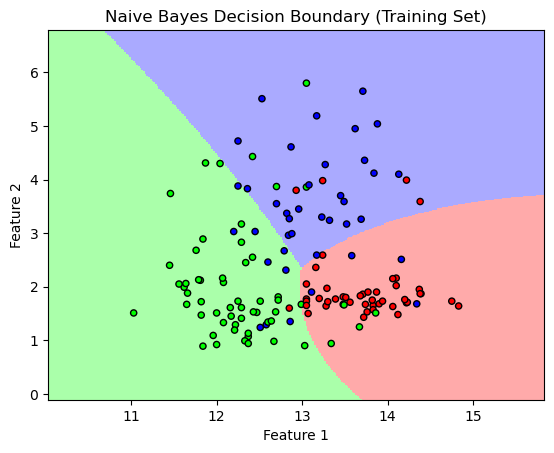

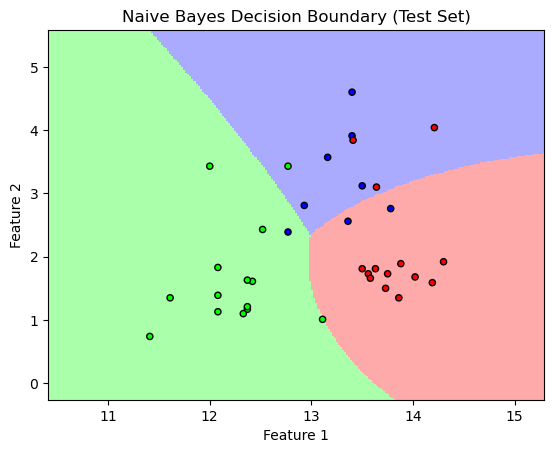

In [4]:
#################################
# NaiveBayes Implementation

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap

class NaiveBayes: 
    def fit(self, X, y): 
        """
        Fit the Naive Bayes classifier to the training data.

        Parameters:
        - X (array-like): Training data, where each row represents a sample and each column represents a feature.
        - y (array-like): Target values.

        Returns:
        - None
        """
        self.classes = np.unique(y)
        self.class_priors = np.array([np.mean(y == i) for i in self.classes])  ## computes the prior probabilities (class frequencies).
        self.mean = [np.mean(X[y == i], axis=0) for i in self.classes]  ## calculates the mean of feature values for each class.
        self.std = [np.std(X[y == i], axis=0) for i in self.classes]   ## calculates the standard deviations of feature values for each class.

    def predict(self, X):
        """
        Predict the class labels for the input data.

        Parameters:
        - X (array-like): Input data, where each row represents a sample and each column represents a feature.

        Returns:
        - array-like: Predicted class labels.
        """
        post = []
        for i, j in enumerate(self.classes):
            prior = np.log(self.class_priors[i])
            likelihood = np.sum(np.log(self.pdf(X, self.mean[i], self.std[i])), axis = 1)
            posterior = prior + likelihood  
            post.append(posterior)
        post = np.array(post).T
        return self.classes[np.argmax(post, axis=1)]

    def pdf(self, X, mean, std):
        """
        Compute the probability density function (PDF) of the Gaussian distribution.

        Parameters:
        - X (array-like): Input data, where each row represents a sample and each column represents a feature.
        - mean (array-like): Mean of the Gaussian distribution.
        - std (array-like): Standard deviation of the Gaussian distribution.

        Returns:
        - array-like: PDF values.
        """
        exponent = np.exp(-(((X - mean)**2)/(2 * (std**2))))
        return (1/(np.sqrt(2 * np.pi) * std)) * exponent


def plot_decision_boundary(X, y, classifier, title):
    """
    Plot the decision boundary of a classifier along with the data points.

    Parameters:
    - X (array-like): Input data.
    - y (array-like): Target labels.
    - classifier: Trained classifier object with a predict method.
    - title (str): Title of the plot.

    Returns:
    - None
    """
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    # Determine plot limits
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    # Generate mesh grid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict class labels for each point in the mesh grid
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot data points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    # Set plot limits
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    # Set plot title and labels
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
    # Show plot
    plt.show()

def main():
    # Load the Wine dataset
    wine = load_wine()
    X = wine.data[:, :2]  # Use only the first two features for visualization
    y = wine.target

    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the Naive Bayes classifier
    nb_classifier = NaiveBayes()
    nb_classifier.fit(X_train, y_train)

    # Predict
    y_pred = nb_classifier.predict(X_test)
    
    # Confusion matrix
    print("Confusion matrix:\n", confusion_matrix(y_test,y_pred))
    
    # Compute accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy of Naive Bayes classifier:", accuracy)

    # Plot decision boundary
    plot_decision_boundary(X_train, y_train, nb_classifier, 'Naive Bayes Decision Boundary (Training Set)')
    
    plot_decision_boundary(X_test, y_test, nb_classifier, 'Naive Bayes Decision Boundary (Test Set)')

if __name__ == "__main__":
    main()